# Questions to Answer
## A. Income (Credits)
    1. How many credit transactions are coming from “OTHERS”? What sources do these represent (salary? refunds? transfers?)
    2. What is the number of credit UPI transactions? Who is sending money frequently?
    3. Is your total credited amount consistent month-to-month?
    4. Which month had the highest income?
    5. Are there irregular or unexpected credit spikes?

## B. Expenses (Debits)
    1. How many debit transactions are through UPI payments? Who are the top recipients?
    2. What categories are these UPI spends going to? (Food? Delivery? Shopping? Travel?)
    3. Why are there very few CARD debits ? Do you mostly use UPI?
    4. You withdrew cash few times via ATM — what were these used for?
    5. Your total spending is slightly higher than income — Which categories are causing overspending?

## C. Cash Flow Behaviour
    1. Which months had negative net savings?
    2. Did your balance ever drop to unsafe levels?
    3. Do you spend more on weekends or weekdays?
    4. Are the last 3 months showing an increasing or decreasing spend trend?

## D. Patterns & Habits
    1. What are your top 10 most frequent UPI recipients?
    2. Which merchants appear repeatedly → possible subscriptions?
    3. Are there daily spending spikes at specific times (night, morning)?
    4. Do you spend more during the 1st week or end of each month?

## ML Predictions
    Can we build a machine-learning model that classifies spending categories, detects anomalies, forecasts monthly savings, and identifies behavioral drifts to improve overall financial discipline?


In [51]:
%pip install kagglehub
%pip install seaborn
%pip install matplotlib
%pip install numpy 
%pip install pandas
%pip install scikit-learn
%pip install prophet
%pip install statsmodels
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.5 MB 9.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.5 MB 7.1 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.5 MB 6.1 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.5 MB 6.5 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.5 MB 7.3 MB/s eta 0:00:01
   --------------------

In [ ]:
import kagglehub
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

### Loading the Dataset 

In [8]:
# Download latest version
path = kagglehub.dataset_download("devildyno/indian-bank-statement-one-year")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rahul\.cache\kagglehub\datasets\devildyno\indian-bank-statement-one-year\versions\1


In [9]:
print(os.listdir(path))

# Load the dataset
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

df.head()


['bank_statements.csv']


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,2023-06-27T09:40:19+05:30,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN
1,DEBIT,CARD,170.0,2010.8,2023-06-28T09:51:57+05:30,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN
2,DEBIT,CARD,500.0,1510.8,2023-07-26T10:04:00+05:30,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06T11:10:38+05:30,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN
4,DEBIT,ATM,1000.0,525.8,2023-08-07T17:13:13+05:30,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN


### Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  985 non-null    object 
 1   mode                  985 non-null    object 
 2   amount                985 non-null    float64
 3   currentBalance        985 non-null    float64
 4   transactionTimestamp  985 non-null    object 
 5   valueDate             985 non-null    object 
 6   txnId                 985 non-null    object 
 7   narration             983 non-null    object 
 8   reference             159 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.4+ KB


In [11]:
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'], utc=True).dt.time
df['valueDate'] = pd.to_datetime(df['valueDate'])

df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.8,04:10:19,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN
1,DEBIT,CARD,170.0,2010.8,04:21:57,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN
2,DEBIT,CARD,500.0,1510.8,04:34:00,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN
3,CREDIT,OTHERS,15.0,1525.8,05:40:38,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN
4,DEBIT,ATM,1000.0,525.8,11:43:13,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN


In [12]:
df['narration_clean'] = df['narration'].astype(str).str.upper().str.strip()
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,narration_clean
0,DEBIT,CARD,100.0,2180.8,04:10:19,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN,GAS FILLING STATION
1,DEBIT,CARD,170.0,2010.8,04:21:57,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN,GAS FILLING STATION
2,DEBIT,CARD,500.0,1510.8,04:34:00,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN,GAS FILLING STATION
3,CREDIT,OTHERS,15.0,1525.8,05:40:38,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN,5188810
4,DEBIT,ATM,1000.0,525.8,11:43:13,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN,ATM


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   type                  985 non-null    object        
 1   mode                  985 non-null    object        
 2   amount                985 non-null    float64       
 3   currentBalance        985 non-null    float64       
 4   transactionTimestamp  985 non-null    object        
 5   valueDate             985 non-null    datetime64[ns]
 6   txnId                 985 non-null    object        
 7   narration             983 non-null    object        
 8   reference             159 non-null    float64       
 9   narration_clean       985 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 77.1+ KB


### Summary

In [14]:
print("Transaction Types:", df["type"].unique())

Transaction Types: ['DEBIT' 'CREDIT']


In [15]:
print("initial balance:", df['currentBalance'].iloc[0])
print("final balance:", df['currentBalance'].iloc[-1])

initial balance: 2180.8
final balance: 761.41


In [16]:
summary = {
    "total_credits": df.loc[df['type']=='CREDIT','amount'].sum(),
    "total_debits": df.loc[df['type']=='DEBIT','amount'].sum(),
    "num_transactions": len(df),
    "date_start": df['valueDate'].min(),
    "date_end": df['valueDate'].max(),
    "net_change": df.loc[df['type']=='CREDIT','amount'].sum() - df.loc[df['type']=='DEBIT','amount'].sum()
}
pd.DataFrame([summary]).T.rename(columns={0:'value'})


,value
total_credits,420570.51
total_debits,422089.9
num_transactions,985
date_start,2023-06-27 00:00:00
date_end,2024-05-30 00:00:00
net_change,-1519.39


### How many transactions does the dataset have ? (days)

In [17]:
print("Rows:", len(df))
print("Date range:", df['valueDate'].min(), "->", df['valueDate'].max(), ",", (df['valueDate'].max() - df['valueDate'].min()).days, "days")

Rows: 985
Date range: 2023-06-27 00:00:00 -> 2024-05-30 00:00:00 , 338 days


=> Dataset involves transactions less than an year

### Monthly Summary

In [18]:
# Monthly summaries (credit, debit, net)
monthly = df.groupby([df['valueDate'].dt.to_period('M'), 'type'])['amount'] \
            .sum().unstack(fill_value=0).reset_index()

monthly = monthly.rename(columns={'CREDIT': 'TOTAL CREDIT', 'DEBIT': 'TOTAL DEBIT'})
monthly['net'] = monthly['TOTAL CREDIT'] - monthly['TOTAL DEBIT']

# Monthly balances
balances = df.sort_values("valueDate").groupby(df['valueDate'].dt.to_period('M')).agg(
    INITIAL_BALANCE=('currentBalance', 'first'),
    FINAL_BALANCE=('currentBalance', 'last'),
).reset_index().rename(columns={'valueDate': 'valueDate'})

monthly = monthly.merge(balances, on='valueDate', how='left')

monthly = monthly.sort_values("valueDate")
monthly


,valueDate,TOTAL CREDIT,TOTAL DEBIT,net,INITIAL_BALANCE,FINAL_BALANCE
0,2023-06,0.00,270.0,-270.00,2180.80,2010.80
1,2023-07,15.00,500.0,-485.00,1510.80,1525.80
2,2023-08,12664.00,10689.0,1975.00,525.80,3500.80
3,2023-09,22605.00,25117.0,-2512.00,0.80,1178.80
4,2023-10,21487.00,20965.0,522.00,1647.80,1495.80
5,2023-11,115722.00,111499.0,4223.00,1350.80,3925.80
6,2023-12,37953.51,41627.8,-3674.29,6744.80,2059.51
7,2024-01,22185.00,23855.7,-1670.70,6609.51,5330.81
8,2024-02,63724.00,41207.9,22516.10,1230.81,23104.91
9,2024-03,25420.00,43641.8,-18221.80,22404.91,5473.11


### Analysis Based on the Category/Naration

In [19]:
print("narration samples of debit transactions:", df[df['type']=='DEBIT']['narration_clean'].unique())

narration samples of debit transactions: ['GAS FILLING STATION' 'ATM' 'UPI/3234' 'UPI/3235' 'UPI/3236'
 'UPI/BHARATPE6' 'UPI/3237' 'UPI/32372' 'UPI/BHARATPE' 'UPI/PAYTM'
 'UPI/32375' 'UPI/3603' 'UPI/32394' 'UPI/3239' 'AMZN' 'UPI/3241'
 'UPI/JIOINAPPDIRECT/' 'UPI/3609' 'UPI/32445' 'UPI/3613' 'UPI/PAYTMPA'
 'UPI/3252' 'UPI/3618' 'UPI/3620' 'UPI/36211' 'UPI/36222' 'UPI/32578'
 'UPI/32571' 'UPI/32576' 'UPI/32581' 'UPI/36250' 'UPI/JIOINAPPDIRECT'
 'UPI/PAYTM101' 'UPI/36298/' 'UPI/3630' 'UPI/32655' 'UPI/36311'
 'UPI/32659' 'UPI/32654' 'UPI/36318' 'UPI/GPAY' 'UPI/PAYTMEP' 'UPI/36341'
 'UPI/32691' 'UPI/36352' 'UPI/36351' 'UPI/32709' 'UPI/32706' 'UPI/36367'
 'UPI/32712' 'UPI/36370' 'UPI/36381' 'UPI/PAYTMAP' 'UPI/32738' 'UPI/36406'
 'UPI/36408' 'UPI/PAYTM9P' 'UPI/36421' 'UPI/32770' 'UPI/32775' 'UPI/36435'
 'UPI/32783' 'UPI/32784' 'UPI/32795' 'UPI/36454' 'UPI/36458'
 'UPI/GPAYBILLREACHARGE' 'UPI/36462' 'UPI/32802' 'UPI/36486'
 'UPI/BHARATPE4' 'UPI/36499' 'UPI/32841' 'UPI/3650' 'UPI/36509'
 'UPI/3

In [20]:
keywords_map = {
    'FUEL': ['GAS', 'FILLING', 'PETROL', 'FUEL', 'FILLING STATION'],
    'FOOD': ['RESTAURANT', 'ZOMATO', 'SWIGGY', 'CAFE', 'DUNZO', 'FOODPANDA'],
    'GROCERIES': ['GROCERY', 'SUPERMARKET', 'GROC'],
    'RENT': ['RENT'],
    'SUBSCRIPTION': ['NETFLIX', 'SPOTIFY', 'PRIME', 'HOTSTAR', 'DISNEY'],
    'TRAVEL': ['IRCTC', 'RAIL', 'FLIGHT', 'AIRLINE', 'UBER', 'OLA', 'TAXI', 'METRO'],
    'ATM': ['ATM'],
    'EMI/LOAN': ['EMI', 'LOAN'],
    'BILLS': ['BILL', 'ELECTRICITY', 'WATER', 'GAS BILL', 'BSES', 'TNEB', 'RECHARGE', 'JIO', 'AIRTEL', 'BILLDESK', 'GPAYBILL', 'EURONET'],
    'HEALTH': ['HOSPITAL', 'PHARMA', 'PHARMACY', 'CLINIC'],
    'SHOPPING': ['AMZN', 'FLIPKART', 'MALL', 'SHOP', 'MARKET', 'PAYTM MALL', 'FASHION', 'CLOTH'],
    'UPI TRANSFER': ['UPI', 'BHIM', 'PAYTM', 'GOOGLEPAY', 'PHONEPE', 'BHARATPE', 'GPAY', 'EAZYPAY'],
}
def categorize(narr):
    for cat, keys in keywords_map.items():
        for k in keys:
            if k in narr:
                return cat
    return 'OTHER'

df['category'] = df['narration_clean'].apply(categorize)

debits = df[df['type']=='DEBIT']

cat_spend = debits.groupby('category').agg(
    total_spend=('amount', 'sum'),
    count=('amount', 'count')
).sort_values('total_spend', ascending=False).reset_index()

cat_spend


,category,total_spend,count
0,UPI TRANSFER,366499.0,622
1,SHOPPING,34961.0,8
2,ATM,13500.0,3
3,BILLS,6299.9,58
4,FUEL,830.0,4


### How many credit transactions are coming from “OTHERS”? What sources do these represent (salary? refunds? transfers?)


In [21]:
print("number of credit transactions:", len(df[df['type']=='CREDIT']))

number of credit transactions: 290


In [22]:
print("number of credit transactions as \"other\":", len(df[(df['type']=='CREDIT') & (df['category']=='OTHER')]))

number of credit transactions as "other": 191


In [23]:
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,narration_clean,category
0,DEBIT,CARD,100.0,2180.8,04:10:19,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
1,DEBIT,CARD,170.0,2010.8,04:21:57,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
2,DEBIT,CARD,500.0,1510.8,04:34:00,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
3,CREDIT,OTHERS,15.0,1525.8,05:40:38,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN,5188810,OTHER
4,DEBIT,ATM,1000.0,525.8,11:43:13,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN,ATM,ATM


In [24]:
print("Sources of credit transactions categorized as \"other\":", df[(df['type']=='CREDIT') & (df['category']=='OTHER')]['narration_clean'].value_counts())

Sources of credit transactions categorized as "other": narration_clean
NEFT          159
IMPS           25
518881000       2
NAN             2
5188810         1
BY CASH         1
5188810000      1
Name: count, dtype: int64


### What is the number of credit UPI transactions? Who is sending money frequently?


In [25]:
print("number of UPI credit transactions:", len(df[(df['type']=='CREDIT') & (df['category']=='UPI TRANSFER')]))

number of UPI credit transactions: 99


In [26]:
print("Money is frequently transferred via UPI by :", df[(df['type']=='CREDIT') & (df['category']=='UPI TRANSFER')]['narration_clean'].value_counts().head())

Money is frequently transferred via UPI by : narration_clean
UPI/3236       4
UPI/4376       2
UPI/40640/U    2
UPI/3264       2
UPI/3234       1
Name: count, dtype: int64


### Are there irregular or unexpected credit spikes?

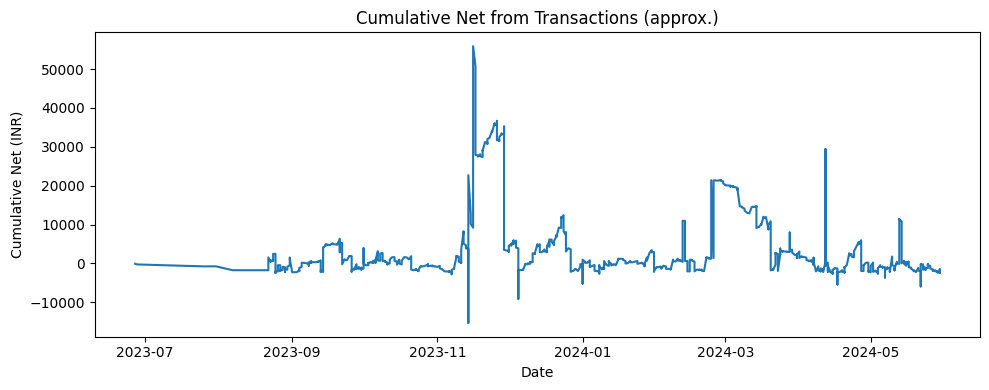

In [27]:
df_sorted = df.sort_values('valueDate').reset_index(drop=True)
df_sorted['signed_amount'] = np.where(df_sorted['type']=='DEBIT', -df_sorted['amount'], df_sorted['amount'])
df_sorted['cum_net'] = df_sorted['signed_amount'].cumsum()

plt.figure(figsize=(10,4))
plt.plot(df_sorted['valueDate'], df_sorted['cum_net'])
plt.title('Cumulative Net from Transactions (approx.)')
plt.xlabel('Date'); plt.ylabel('Cumulative Net (INR)')
plt.tight_layout()
plt.show()

A sudden spike is seen near November of 2023

### How many debit transactions are through UPI payments? Who are the top recipients?
    

In [28]:
print("Number of debit transactions through UPI:", len(df[(df['type']=='DEBIT') & (df['mode']=='UPI')]))

Number of debit transactions through UPI: 688


### What categories are these UPI spends going to? (Food? Delivery? Shopping? Travel?)
    

In [29]:
print(df[(df['type']=='DEBIT') & (df['mode']=='UPI')]['category'].value_counts())

category
UPI TRANSFER    622
BILLS            58
SHOPPING          8
Name: count, dtype: int64


### Why are there very few CARD debits ? Do you mostly use UPI?


In [30]:
print(df[(df['type']=='DEBIT')]['mode'].value_counts())

mode
UPI     688
CARD      4
ATM       3
Name: count, dtype: int64


Yes, most of the debits are done through UPI transfers.

### You withdrew cash few times via ATM — what were these used for?

In [31]:
print(df[(df['mode']=='ATM')]['category'].value_counts())

category
ATM    3
Name: count, dtype: int64


In [32]:
print(df[df["mode"] == "ATM"])

      type mode   amount  currentBalance transactionTimestamp  valueDate  \
4    DEBIT  ATM   1000.0          525.80             11:43:13 2023-08-07   
537  DEBIT  ATM  10000.0         3244.81             08:31:51 2024-02-13   
723  DEBIT  ATM   2500.0          223.11             04:56:34 2024-04-08   

                                    txnId narration  reference  \
4    1a018d91-db8a-416d-b49f-d03a84bc5c7b       ATM        NaN   
537  6984b44d-3a50-409f-a3ca-1194f0d8f98e       ATM        NaN   
723  94b76a54-2e1c-4a80-af58-f1b189d34d50       ATM        NaN   

    narration_clean category  
4               ATM      ATM  
537             ATM      ATM  
723             ATM      ATM  


### Your total spending is slightly higher than income — Which categories are causing overspending?

In [33]:
print("Total Debit Amount:", df[(df['type']=='DEBIT')]['amount'].sum(), "\nTotal Credit Amount:", df[(df['type']=='CREDIT')]['amount'].sum())

Total Debit Amount: 422089.9 
Total Credit Amount: 420570.51


In [34]:
category_totals = df.groupby(['category', 'type'])['amount'].sum().unstack(fill_value=0).reset_index()
Totals = {'category': 'TOTALS', 'CREDIT': category_totals['CREDIT'].sum(), 'DEBIT': category_totals['DEBIT'].sum()}
category_totals = pd.concat([category_totals, pd.DataFrame([Totals])], ignore_index=True)
print(category_totals)

       category     CREDIT     DEBIT
0           ATM       0.00   13500.0
1         BILLS       0.00    6299.9
2          FUEL       0.00     830.0
3         OTHER  241937.51       0.0
4      SHOPPING       0.00   34961.0
5  UPI TRANSFER  178633.00  366499.0
6        TOTALS  420570.51  422089.9


### Did your balance ever drop to unsafe levels?


In [35]:
df

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,narration_clean,category
0,DEBIT,CARD,100.0,2180.80,04:10:19,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
1,DEBIT,CARD,170.0,2010.80,04:21:57,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
2,DEBIT,CARD,500.0,1510.80,04:34:00,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL
3,CREDIT,OTHERS,15.0,1525.80,05:40:38,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN,5188810,OTHER
4,DEBIT,ATM,1000.0,525.80,11:43:13,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN,ATM,ATM
...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,12:27:40,2024-05-29,c3b42859-ac27-483b-9759-c518aeb1e5ab,UPI/PAYTMap,NaN,UPI/PAYTMAP,UPI TRANSFER
981,CREDIT,OTHERS,938.0,961.41,23:37:05,2024-05-30,2edaf543-5afd-4247-9320-5c213957cd98,NEFT,8646845.0,NEFT,OTHER
982,DEBIT,UPI,60.0,901.41,04:28:24,2024-05-30,87392ae7-630a-4cee-b8c3-d57f144654c1,UPI/4517,NaN,UPI/4517,UPI TRANSFER
983,DEBIT,UPI,130.0,771.41,08:00:30,2024-05-30,dc9a8f29-efdb-434b-a140-6e20f7185aa3,UPI/4517,NaN,UPI/4517,UPI TRANSFER


Assuming the safe balance threshold is INR 5000, the balance dropped below this level on the following dates:


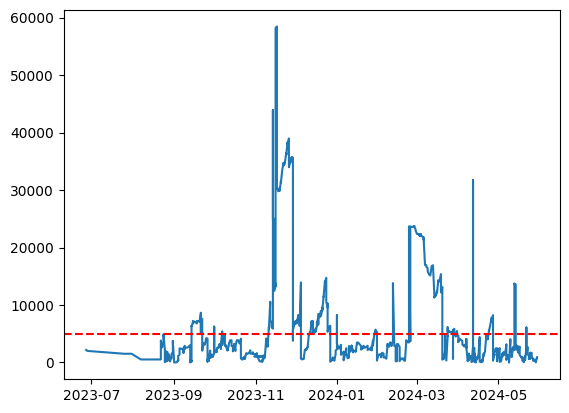

In [36]:
print("Assuming the safe balance threshold is INR 5000, the balance dropped below this level on the following dates:")
plt.plot(df['valueDate'], df['currentBalance'])
plt.axhline(y=5000, color='r', linestyle='--')
plt.show()

### Do you spend more on weekends or weekdays?


In [37]:
df["day_of_week"] = df['valueDate'].dt.day_name()
weekend_spend = df[(df['type']=='DEBIT') & (df['day_of_week'].isin(['Saturday', 'Sunday']))]['amount'].sum()
weekday_spend = df[(df['type']=='DEBIT') & (~df['day_of_week'].isin(['Saturday', 'Sunday']))]['amount'].sum()
print("Total Weekend Spend:", weekend_spend.round(2))
print("Total Weekday Spend:", weekday_spend.round(2))

Total Weekend Spend: 92200.6
Total Weekday Spend: 329889.3


### Are the last 3 months showing an increasing or decreasing spend trend?

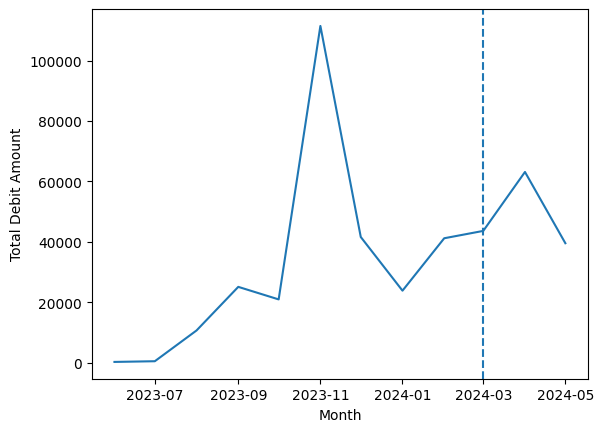

In [38]:
monthly_debit = (
    df[df["type"] == "DEBIT"]
    .groupby(df['valueDate'].dt.to_period('M'))['amount']
    .sum()
)

monthly_debit.index = monthly_debit.index.to_timestamp()

plt.plot(monthly_debit.index, monthly_debit.values)
plt.axvline(x=monthly_debit.index.max() - pd.DateOffset(months=2), linestyle='--')
plt.xlabel("Month")
plt.ylabel("Total Debit Amount")
plt.show()


In [39]:
monthly_debit = (
    df[df["type"] == "DEBIT"]
    .groupby(df['valueDate'].dt.to_period('M'))['amount']
    .sum()
    .sort_index()
)

monthly_debit.index = monthly_debit.index.to_timestamp()

last_3 = monthly_debit.tail(3)
print(last_3)



valueDate
2024-03-01    43641.8
2024-04-01    63154.9
2024-05-01    39561.8
Freq: MS, Name: amount, dtype: float64


In [40]:
if last_3.is_monotonic_increasing:
    print("Spending is increasing in the last 3 months.")
elif last_3.is_monotonic_decreasing:
    print("Spending is decreasing in the last 3 months.")
else:
    print("Spending trend is mixed in the last 3 months.")

pct_change = last_3.pct_change() * 100
print(pct_change)

Spending trend is mixed in the last 3 months.
valueDate
2024-03-01          NaN
2024-04-01    44.711950
2024-05-01   -37.357513
Freq: MS, Name: amount, dtype: float64


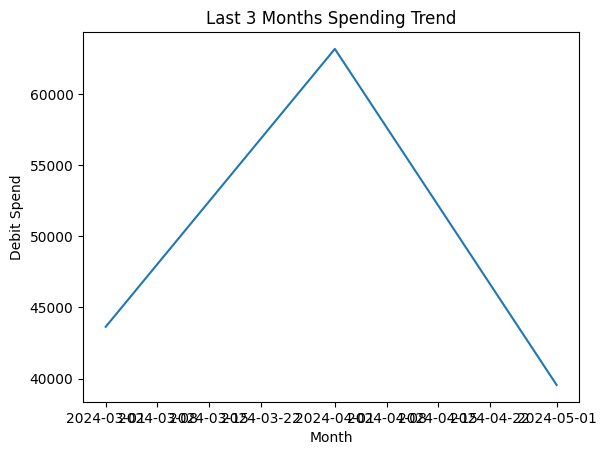

In [41]:
plt.plot(last_3.index, last_3.values)
plt.title("Last 3 Months Spending Trend")
plt.xlabel("Month")
plt.ylabel("Debit Spend")
plt.show()

### Are there daily spending spikes at specific times (night, morning)?


In [42]:
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'], format="%H:%M:%S").dt.time
df['transactionTimedelta'] = pd.to_timedelta(df['transactionTimestamp'].astype(str))

morning_start = pd.Timedelta("06:00:00")
morning_end   = pd.Timedelta("09:59:59")

forenoon_start = pd.Timedelta("10:00:00")
forenoon_end   = pd.Timedelta("12:00:00")

afternoon_start = pd.Timedelta("12:00:01")
afternoon_end   = pd.Timedelta("16:59:59")

evening_start = pd.Timedelta("17:00:00")
evening_end   = pd.Timedelta("23:59:59")

night_start = pd.Timedelta("00:00:00")
night_end   = pd.Timedelta("05:59:59")

td = df['transactionTimedelta']

df['partOfTheDay'] = np.select(
    [
        td.between(night_start, night_end),
        td.between(morning_start, morning_end),
        td.between(forenoon_start, forenoon_end),
        td.between(afternoon_start, afternoon_end),
        td.between(evening_start, evening_end),
    ],
    [
        'Night',
        'Morning',
        'Forenoon',
        'Afternoon',
        'Evening'
    ],
    default='Unknown'
)
df


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,narration_clean,category,day_of_week,transactionTimedelta,partOfTheDay
0,DEBIT,CARD,100.0,2180.80,04:10:19,2023-06-27,6e80ee9f-49b5-434f-8ab6-f192a2296e6c,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL,Tuesday,0 days 04:10:19,Night
1,DEBIT,CARD,170.0,2010.80,04:21:57,2023-06-28,a734aa85-4bf8-44c0-b508-305f554dc51e,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL,Wednesday,0 days 04:21:57,Night
2,DEBIT,CARD,500.0,1510.80,04:34:00,2023-07-26,dc44e071-399f-4ec2-b6ec-64f9e8a05a8a,GAS FILLING STATION,NaN,GAS FILLING STATION,FUEL,Wednesday,0 days 04:34:00,Night
3,CREDIT,OTHERS,15.0,1525.80,05:40:38,2023-07-31,0adc1ed0-4809-462d-855c-84cda5593c80,5188810,NaN,5188810,OTHER,Monday,0 days 05:40:38,Night
4,DEBIT,ATM,1000.0,525.80,11:43:13,2023-08-07,1a018d91-db8a-416d-b49f-d03a84bc5c7b,ATM,NaN,ATM,ATM,Monday,0 days 11:43:13,Forenoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,12:27:40,2024-05-29,c3b42859-ac27-483b-9759-c518aeb1e5ab,UPI/PAYTMap,NaN,UPI/PAYTMAP,UPI TRANSFER,Wednesday,0 days 12:27:40,Afternoon
981,CREDIT,OTHERS,938.0,961.41,23:37:05,2024-05-30,2edaf543-5afd-4247-9320-5c213957cd98,NEFT,8646845.0,NEFT,OTHER,Thursday,0 days 23:37:05,Evening
982,DEBIT,UPI,60.0,901.41,04:28:24,2024-05-30,87392ae7-630a-4cee-b8c3-d57f144654c1,UPI/4517,NaN,UPI/4517,UPI TRANSFER,Thursday,0 days 04:28:24,Night
983,DEBIT,UPI,130.0,771.41,08:00:30,2024-05-30,dc9a8f29-efdb-434b-a140-6e20f7185aa3,UPI/4517,NaN,UPI/4517,UPI TRANSFER,Thursday,0 days 08:00:30,Morning


In [43]:
part_of_day_spend = df[(df['type']=='DEBIT')].groupby('partOfTheDay')['amount'].sum()
print(part_of_day_spend)

partOfTheDay
Afternoon    170734.7
Evening        3708.0
Forenoon      97149.9
Morning       90102.7
Night         60394.6
Name: amount, dtype: float64


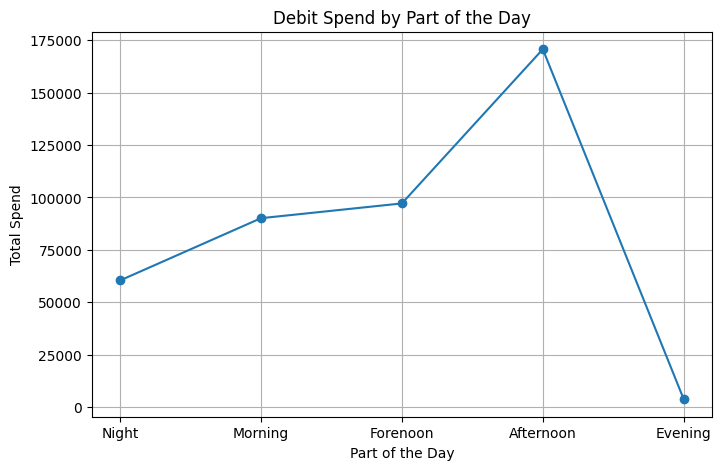

In [44]:
import matplotlib.pyplot as plt

spend = (df[df['type']=='DEBIT']
         .groupby('partOfTheDay')['amount']
         .sum()
         .reindex(['Night','Morning','Forenoon','Afternoon','Evening'])   # ordered
)

plt.figure(figsize=(8,5))
plt.plot(spend.index, spend.values, marker='o')
plt.xlabel("Part of the Day")
plt.ylabel("Total Spend")
plt.title("Debit Spend by Part of the Day")
plt.grid(True)
plt.show()


We can see that the debit is high during the afternoon i.e., between 12:00:00 and 17:00:00

### Do you spend more during the 1st week or end of each month?

In [45]:
df['valueDate'] = pd.to_datetime(df['valueDate'])

df['weekOfMonth'] = (df['valueDate'].dt.day - 1) // 7 + 1
df['lastWeek'] = (df['valueDate'].dt.days_in_month - 1) // 7 + 1

spend_df = df[df['type'] == 'DEBIT'].copy()

spend_df['yearMonth'] = spend_df['valueDate'].dt.to_period('M')

results = []

for ym, sub in spend_df.groupby('yearMonth'):

    week1_spend = sub[sub['weekOfMonth'] == 1]['amount'].sum()
    lastweek_spend = sub[sub['weekOfMonth'] == sub['lastWeek']]['amount'].sum()

    if week1_spend > lastweek_spend:
        msg = "Week 1"
    elif week1_spend < lastweek_spend:
        msg = "Last Week"
    else:
        msg = "Equal"

    results.append([str(ym), week1_spend, lastweek_spend, msg])

summary_df = pd.DataFrame(results, columns=["Month", "Week1 Spend", "LastWeek Spend", "Higher Spend"])
print(summary_df)

      Month  Week1 Spend  LastWeek Spend Higher Spend
0   2023-06          0.0             0.0        Equal
1   2023-07          0.0             0.0        Equal
2   2023-08       1000.0          1565.0    Last Week
3   2023-09       3725.0           875.0       Week 1
4   2023-10       8435.0           252.0       Week 1
5   2023-11       2500.0         31932.0    Last Week
6   2023-12      17304.0           588.0       Week 1
7   2024-01       9166.0          5687.0       Week 1
8   2024-02       1629.0           700.0       Week 1
9   2024-03       6643.9          2121.0       Week 1
10  2024-04       5220.0          2305.0       Week 1
11  2024-05       6901.0           895.9       Week 1


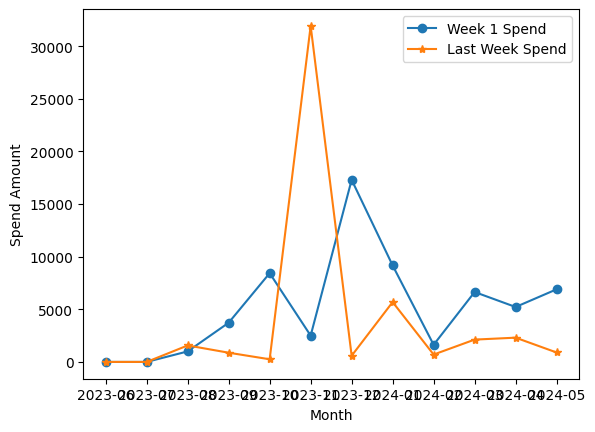

In [46]:
plt.plot(summary_df["Month"], summary_df["Week1 Spend"], label="Week 1 Spend", marker='o')
plt.plot(summary_df["Month"], summary_df["LastWeek Spend"], label="Last Week Spend", marker='*')
plt.xlabel("Month")
plt.ylabel("Spend Amount")  
plt.legend()
plt.show()


## ML Part

### Category Classification Model (NLP)

It builds a machine-learning model that can predict the spending category (Fuel, Food, Travel, etc.) from the narration text in bank statements.

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Clean narration text
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'[^a-z0-9 ]', ' ', t)
    return t

df['cleanNarration'] = df['narration'].apply(clean_text)

X = df['cleanNarration']
y = df['category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, stop_words='english')),
    ('model', LogisticRegression(max_iter=1000))
])

clf.fit(X_train, y_train)

print("Category Classifier Accuracy:", clf.score(X_test, y_test))


Category Classifier Accuracy: 0.9949238578680203


### Anomaly Detection (Isolation Forest)

It detects unusual or suspicious transactions, such as: unusually large debit amounts, duplicate UPI transactions and micro-transactions repeated too often

In [61]:
from sklearn.ensemble import IsolationForest

anomaly_df = df[df["type"] == "DEBIT"][['amount']].copy()
model_anomaly = IsolationForest(contamination=0.03, random_state=42)
anomaly_df['anomaly_score'] = model_anomaly.fit_predict(anomaly_df[['amount']])

df['isAnomaly'] = anomaly_df['anomaly_score']

# Show detected anomalies
df[df['isAnomaly'] == -1]


,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,narration_clean,category,day_of_week,transactionTimedelta,partOfTheDay,weekOfMonth,lastWeek,cleanNarration,isAnomaly
277,DEBIT,UPI,16500.0,27391.80,13:19:41,2023-11-14,6d29d619-312a-4bdc-9371-636828f19d5f,UPI/PAYTMUP,NaN,UPI/PAYTMUP,UPI TRANSFER,Tuesday,0 days 13:19:41,Afternoon,2,5,upi paytmup,-1.0
285,DEBIT,UPI,10000.0,12970.80,12:18:21,2023-11-15,3d2ba381-c2df-42d5-b507-4bcc2bf44905,UPI/36858,NaN,UPI/36858,UPI TRANSFER,Wednesday,0 days 12:18:21,Afternoon,3,5,upi 36858,-1.0
295,DEBIT,UPI,21000.0,35400.80,11:04:54,2023-11-17,a90254ac-1868-4bca-ac10-61964ac95367,UPI/FASHIONEAZY,NaN,UPI/FASHIONEAZY,SHOPPING,Friday,0 days 11:04:54,Forenoon,3,5,upi fashioneazy,-1.0
296,DEBIT,UPI,5200.0,30200.80,13:02:29,2023-11-17,9e5ed584-6d6c-411a-9554-d1bb99972aa1,UPI/36871,NaN,UPI/36871,UPI TRANSFER,Friday,0 days 13:02:29,Afternoon,3,5,upi 36871,-1.0
322,DEBIT,UPI,5000.0,33972.80,06:53:45,2023-11-26,75635fc2-67a3-4539-8e05-ee1a20c78efa,UPI/36963,NaN,UPI/36963,UPI TRANSFER,Sunday,0 days 06:53:45,Morning,4,5,upi 36963,-1.0
332,DEBIT,UPI,19000.0,16625.80,10:45:33,2023-11-29,dfbb98e2-96b0-4992-aed0-acc3c73cd167,UPI/33333,NaN,UPI/33333,UPI TRANSFER,Wednesday,0 days 10:45:33,Forenoon,5,5,upi 33333,-1.0
333,DEBIT,UPI,12700.0,3925.80,11:39:47,2023-11-29,fa3a4eef-62d7-4983-bec0-de57682a2351,UPI/36992,NaN,UPI/36992,UPI TRANSFER,Wednesday,0 days 11:39:47,Forenoon,5,5,upi 36992,-1.0
353,DEBIT,UPI,13000.0,865.80,10:20:06,2023-12-05,069c0e2e-c49f-4381-b345-9fa78ad7005f,UPI/BHARATPE,NaN,UPI/BHARATPE,UPI TRANSFER,Tuesday,0 days 10:20:06,Forenoon,1,5,upi bharatpe,-1.0
419,DEBIT,UPI,5000.0,1145.51,10:09:10,2023-12-27,24c9cfcd-9ea9-411f-85df-98faebff3b25,UPI/33610,NaN,UPI/33610,UPI TRANSFER,Wednesday,0 days 10:09:10,Forenoon,4,5,upi 33610,-1.0
506,DEBIT,UPI,5000.0,330.81,09:25:18,2024-01-31,73617a32-1890-46c5-bb78-b8a858d966fd,UPI/43972,NaN,UPI/43972,UPI TRANSFER,Wednesday,0 days 09:25:18,Morning,5,5,upi 43972,-1.0


### Monthly Forecasting (Prophet)

Uses Facebook Prophet to predict future monthly spending.

16:41:53 - cmdstanpy - INFO - Chain [1] start processing
16:41:54 - cmdstanpy - INFO - Chain [1] done processing


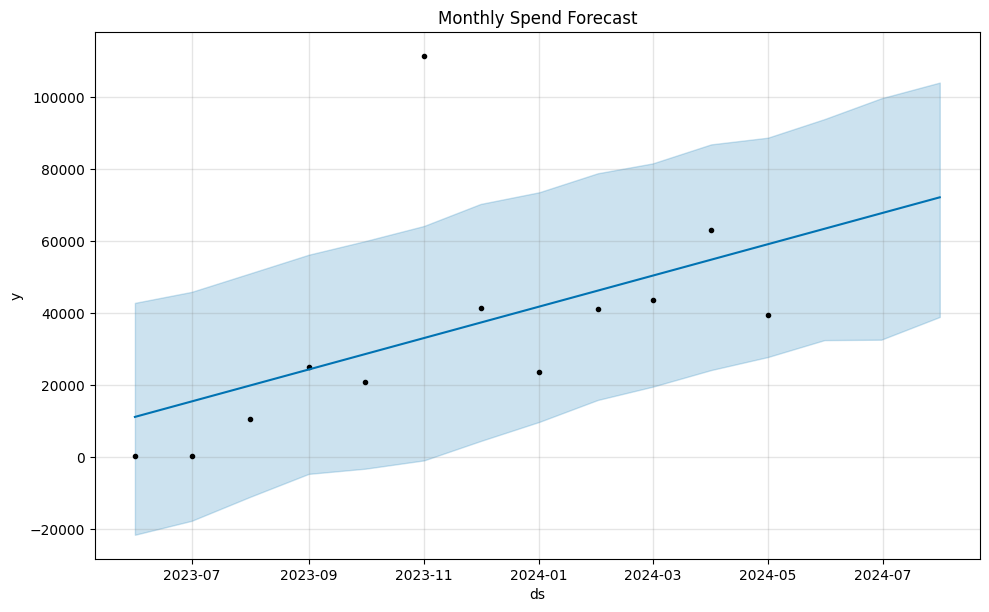

In [60]:
from prophet import Prophet

forecast_df = df[df["type"] == "DEBIT"].groupby(df['valueDate'].dt.to_period("M"))['amount'].sum().reset_index()
forecast_df['valueDate'] = forecast_df['valueDate'].dt.to_timestamp()

forecast_df = forecast_df.rename(columns={'valueDate': 'ds', 'amount': 'y'})

m = Prophet()
m.fit(forecast_df)

future = m.make_future_dataframe(periods=3, freq='M')
forecast = m.predict(future)

m.plot(forecast)
plt.title("Monthly Spend Forecast")
plt.show()


### Behavioral Drift Detection

Measures how your financial behavior changes over time.

In [62]:
monthly_stats = df[df["type"] == "DEBIT"].groupby(df['valueDate'].dt.to_period('M')).agg({
    'amount': ['mean', 'sum', 'std', 'count']
})

monthly_stats.columns = ['mean_spend', 'total_spend', 'spend_std', 'txn_count']
monthly_stats = monthly_stats.reset_index()

monthly_stats['drift_score'] = monthly_stats['mean_spend'].diff().fillna(0)

monthly_stats


,valueDate,mean_spend,total_spend,spend_std,txn_count,drift_score
0,2023-06,135.000000,270.0,49.497475,2,0.000000
1,2023-07,500.000000,500.0,NaN,1,365.000000
2,2023-08,445.375000,10689.0,682.652042,24,-54.625000
3,2023-09,456.672727,25117.0,925.072531,55,11.297727
4,2023-10,322.538462,20965.0,711.126661,65,-134.134266
5,2023-11,1527.383562,111499.0,4155.912671,73,1204.845100
6,2023-12,693.796667,41627.8,1841.045469,60,-833.586895
7,2024-01,467.758824,23855.7,866.603592,51,-226.037843
8,2024-02,777.507547,41207.9,3045.968725,53,309.748724
9,2024-03,532.217073,43641.8,1660.344820,82,-245.290474
